# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

<p> In this data for driving licenses and traffic accidents in Saudi Arabia, we use them to measure the rate of increase in accidents in 2018 and compare it with previous years to note whether Saudi women driving affected the accident rate, as allowing women to drive is a major change in data in Saudi Arabia.</p>

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

Women driving in Saudi Arabia has greatly reduced accidents, which proves the ability of women and their commitment to traffic and safety regulations

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
traffic_accidents = pd.read_csv("../data/saudi-arabia-traffic-accidents-2008.csv",sep=";",index_col=[0])

In [3]:
driving_licenses = pd.read_csv("../data/saudi-arabia-driving-licenses-2004-2008.csv",sep=";")

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
traffic_accidents.head(10)

,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [5]:
driving_licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.


<h6> traffic_accidents Dataset contains the following columns: 
    </h6>
    
<p> Unnamed: 0.1:Extra index .<br>
Year   : The year of calculating these cases <br>
Region : The region in which these cases were counted<br>
Indicator: Indicator of  Injured, Dead and Accidents<br>
Value : Value for each indicator<br>
geo_point_2d: The geo point for each region<br>

<h6> driving_licenses Dataset contains the following columns:</h6>
<p> Year : The year the licenses were issued<br>
Administritive Area : The license issuance area<br>
Driving Liceses	: Number of licenses issued<br>
geo_point_2d: The geo point for each Area</p>

<br>
From my observation of the traffic accident data that they contain the main regions in the Kingdom of Saudi Arabia describing the types of accidents in each region in the years between 2016-2017.
As for the driving licenses data, it shows the number of licenses issued in the main regions of Saudi Arabia every year between 1993-2017



#### 4a. How complete is the data?

Investigate missing values etc.

In [6]:
driving_licenses.isna().sum()

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

there is 25 missing value at geo_point_2d column

In [7]:
traffic_accidents.isna().sum()

Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

there is 6 missing value at geo_point_2d column

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

<p>There are problems with formatting the data. Column names are unclear, the Years column contains parentheses, and the Values column contains text</p>

In [8]:
print(f"minimum possible value for traffic_accidents dataset\n {traffic_accidents.min()} \n and maximum possible value is\n{traffic_accidents.max()}")

minimum possible value for traffic_accidents dataset
 Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object 
 and maximum possible value is
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object


In [9]:
print(f"minimum possible value for driving_licenses dataset\n {driving_licenses.min()} \n and maximum possible value is\n{driving_licenses.max()}")

minimum possible value for driving_licenses dataset
 Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object 
 and maximum possible value is
Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
traffic_accidents.dtypes

Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [11]:
driving_licenses.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<h6> For traffic_accidents dataset:</h6>
<p>year and Value columns type is obeject but it should be int 
geo_point_2d column type is obeject but it shold be float</p>

<h6> For driving_licenses dataset:</h6>
<p>
year and Driving Liceses columns type is obeject but it should be int
geo_point_2d column type is obeject but it should be float</p>

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
#Define a function to convert numerical columns to int
def to_int(dataset,col):
    dataset[col]=dataset[col].apply(lambda col:col.replace("(","").replace(")","").replace("n","") ).astype(int)
    return dataset

In [13]:
to_int(traffic_accidents,'Year')

,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,2016,Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,2016,Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2016,Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,2016,Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,2016,Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
...,...,...,...,...,...,...
79,79,2017,Asir,No. of Casualties - Injured,2368n,"19.1387847401, 42.941470036"
80,80,2017,Hail,No. of Casualties - Injured,773n,"27.400845724, 41.4406960508"
81,81,2017,Al-Baaha,No. of Casualties - Dead,134n,"20.1484058503, 41.4665484892"
82,82,2017,Al-Baaha,No. of Accidents,1414n,"20.1484058503, 41.4665484892"


In [14]:
traffic_accidents.dtypes

Unnamed: 0.1     int64
Year             int64
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [15]:
to_int(traffic_accidents,'Value')

,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"
2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394"
3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508"
4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508"
...,...,...,...,...,...,...
79,79,2017,Asir,No. of Casualties - Injured,2368,"19.1387847401, 42.941470036"
80,80,2017,Hail,No. of Casualties - Injured,773,"27.400845724, 41.4406960508"
81,81,2017,Al-Baaha,No. of Casualties - Dead,134,"20.1484058503, 41.4665484892"
82,82,2017,Al-Baaha,No. of Accidents,1414,"20.1484058503, 41.4665484892"


In [16]:
traffic_accidents.dtypes

Unnamed: 0.1     int64
Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object

In [17]:
to_int(driving_licenses,"Year")

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,2012,Makkah,143954n,"21.628962766, 41.2636898334"
1,1,1994,Makkah,75349n,"21.628962766, 41.2636898334"
2,2,1998,Makkah,86082n,"21.628962766, 41.2636898334"
3,3,2004,Makkah,86636n,"21.628962766, 41.2636898334"
4,4,2005,Makkah,65099n,"21.628962766, 41.2636898334"
...,...,...,...,...,...
345,345,2000,Tabouk,8473n,"27.90165499, 37.2598581394"
346,346,2006,Tabouk,8259n,"27.90165499, 37.2598581394"
347,347,2013,Hail,9731n,"27.400845724, 41.4406960508"
348,348,1997,Hail,6606n,"27.400845724, 41.4406960508"


In [18]:
to_int(driving_licenses,"Driving Liceses")

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334"
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334"
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334"
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334"
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334"
...,...,...,...,...,...
345,345,2000,Tabouk,8473,"27.90165499, 37.2598581394"
346,346,2006,Tabouk,8259,"27.90165499, 37.2598581394"
347,347,2013,Hail,9731,"27.400845724, 41.4406960508"
348,348,1997,Hail,6606,"27.400845724, 41.4406960508"


In [19]:
driving_licenses.dtypes

Unnamed: 0              int64
Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
dtype: object

Dropping Unnecessary columns

In [20]:
driving_licenses_clean=driving_licenses.drop(columns=['Unnamed: 0'], axis=1)

In [21]:
traffic_accidents_clean=traffic_accidents.drop(columns=['Unnamed: 0.1'], axis=1)

- Make new columns `x` and `y` using `geo_point_2d`

In [22]:
driving_licenses_clean.dtypes

Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [23]:
driving_licenses_clean['x'] = driving_licenses_clean['geo_point_2d'].str.split(',',1).str[0].astype(float)

In [24]:
driving_licenses_clean['y'] = driving_licenses_clean['geo_point_2d'].str.split(',',1).str[1].astype(float)

In [25]:
driving_licenses_clean.head(2)

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369


In [26]:
driving_licenses_clean.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object

In [27]:
traffic_accidents_clean.dtypes

Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [28]:
traffic_accidents_clean['x'] = traffic_accidents_clean['geo_point_2d'].str.split(',',1).str[0].astype(float)

In [29]:
traffic_accidents_clean['y'] = traffic_accidents_clean['geo_point_2d'].str.split(',',1).str[1].astype(float)

In [30]:
traffic_accidents_clean.dtypes

Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
dtype: object

In [31]:
driving_licenses_clean=driving_licenses_clean.drop(columns=['geo_point_2d'], axis=1)

In [32]:
traffic_accidents_clean=traffic_accidents_clean.drop(columns=['geo_point_2d'], axis=1)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [33]:
traffic_accidents_clean.head(2)

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.26369
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.14783


In [34]:
driving_licenses_clean.head(2)

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369


- Display the data types again to confirm they are correct.

In [35]:
traffic_accidents_clean.dtypes

Year           int64
Region        object
Indicator     object
Value          int64
x            float64
y            float64
dtype: object

In [36]:
driving_licenses_clean.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
x                      float64
y                      float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [37]:
traffic_accidents_clean.columns

Index(['Year', 'Region', 'Indicator', 'Value', 'x', 'y'], dtype='object')

In [38]:
traffic_accidents_new=traffic_accidents_clean.copy()

In [39]:
new_traffic_accidents_col_names = ['traffic_year','traffic_region','traffic_indicator','traffic_value',
            'traffic_x_geo_point','traffic_y_geo_point']
traffic_accidents_new.columns = new_traffic_accidents_col_names

In [40]:
traffic_accidents_new.columns

Index(['traffic_year', 'traffic_region', 'traffic_indicator', 'traffic_value',
       'traffic_x_geo_point', 'traffic_y_geo_point'],
      dtype='object')

In [41]:
driving_licenses_new=driving_licenses_clean.copy()

In [42]:
new_driving_licenses_col_names = ['licenses_year','licenses_region','driving_licenses',
            'licenses_x_geo_point','licenses_y_geo_point']
driving_licenses_new.columns = new_driving_licenses_col_names

In [43]:
driving_licenses_new.columns

Index(['licenses_year', 'licenses_region', 'driving_licenses',
       'licenses_x_geo_point', 'licenses_y_geo_point'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|licenses_year|int|driving_licenses|The year the licenses were issued|
|licenses_region|object|driving_licenses|The license issuance area|
|driving_llicenses|object|driving_licenses|Number of licenses issued|
|licenses_x_geo_point|float|Driving_Licenses|The x geo point for each Area| 
|licenses_y_geo_point|float|Driving_Licenses|The y geo point for each Area| 
|traffic_year|int|Traffic_Accidents|The year of calculating these cases | 
|traffic_region|object|Traffic_Accidents|The region in which these cases were counted| 
|traffic_indicator|object|Traffic_Accidents|Indicator of  Injured, Dead and Accidents| 
|traffic_value|int|Traffic_Accidents| Value for each indicator| 
|traffic_x_geo_point|float|Traffic_Accidents|The x geo point for each region| 
|traffic_y_geo_point|float|Traffic_Accidents|The y geo point for each region| 


#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [44]:
driving_licenses_new['licenses_region'].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [45]:
traffic_accidents_new['traffic_region'].unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

<p>There are some rows in the Regions column that do not belong to this column</p>

Which rows are not associated with regions?
there are some values doesn't associated  with traffic_region or licenses_area name " Total "

In [46]:
traffic_accidents_new[((traffic_accidents_new.traffic_region == 'Total'))]

,traffic_year,traffic_region,traffic_indicator,traffic_value,traffic_x_geo_point,traffic_y_geo_point
8,2017,Total,No. of Casualties - Dead,7489,NaN,NaN
29,2016,Total,No. of Accidents,533380,NaN,NaN
30,2016,Total,No. of Casualties - Injured,38120,NaN,NaN
68,2017,Total,No. of Accidents,460488,NaN,NaN
69,2017,Total,No. of Casualties - Injured,33199,NaN,NaN
77,2016,Total,No. of Casualties - Dead,9031,NaN,NaN


In [47]:
driving_licenses_new[((driving_licenses_new.licenses_region == 'Total'))]

,licenses_year,licenses_region,driving_licenses,licenses_x_geo_point,licenses_y_geo_point
58,2015,Total,435439,NaN,NaN
59,2017,Total,928165,NaN,NaN
60,1993,Total,294893,NaN,NaN
61,1994,Total,303520,NaN,NaN
62,2003,Total,254858,NaN,NaN
63,2006,Total,267508,NaN,NaN
142,2014,Total,625414,NaN,NaN
143,2010,Total,386510,NaN,NaN
144,2012,Total,411204,NaN,NaN
145,1999,Total,332210,NaN,NaN


In [48]:
driving_licenses_back_to_wide=driving_licenses_new.pivot(index='licenses_region',columns="licenses_year",values='driving_licenses').reset_index()
driving_licenses_back_to_wide.head(2)

licenses_year,licenses_region,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Al-Baha,3270,2729,2423,1468,3027,5110,4246,4832,7594,...,5418,9815,7076,6450,7593,7482,7268,4856,4614,4131
1,Al-Jouf,2884,2535,2270,2518,3565,3476,3950,4666,4756,...,10929,10567,10937,10180,10246,11602,9982,10233,9371,8091


In [49]:
driving_licenses_back_to_wide

licenses_year,licenses_region,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Al-Baha,3270,2729,2423,1468,3027,5110,4246,4832,7594,...,5418,9815,7076,6450,7593,7482,7268,4856,4614,4131
1,Al-Jouf,2884,2535,2270,2518,3565,3476,3950,4666,4756,...,10929,10567,10937,10180,10246,11602,9982,10233,9371,8091
2,Al-Qaseem,73618,68916,49690,42693,10092,11350,9983,12226,14718,...,22236,27571,36737,10760,11421,17889,29113,13631,9180,6318
3,Assir,6226,5185,4889,3319,12204,13220,14625,18622,20321,...,18800,21582,21835,24515,23136,29730,29552,38567,41367,39133
4,Eastern,9964,10918,7831,8461,58814,70650,64973,65767,74119,...,104626,108544,110295,151087,129971,123325,121774,135752,142307,126816
5,Hail,10484,11131,9735,10267,6606,4708,3139,3215,6077,...,7413,7282,7637,9123,11082,9731,10417,7172,54507,22035
6,Jazan,6009,3826,2284,2226,5695,2613,4792,5678,10631,...,11346,9437,12270,10946,11156,14175,15621,13931,11504,18345
7,Madinah,4122,3767,4155,3425,10495,13020,11108,9562,13561,...,9194,11574,15045,14630,14459,28513,31447,22744,24540,36165
8,Makkah,65977,75349,60356,46195,76623,86082,103535,87053,85593,...,77013,112045,113531,110647,143954,131108,149234,157389,136055,142487
9,Najran,3769,3880,3268,3274,3073,4322,3959,4905,4950,...,7938,6771,6360,7314,9201,8996,9601,1864,2153,13825


In [50]:
traffic_accidents_back_to_wide=pd.pivot_table(traffic_accidents_new,index=['traffic_region','traffic_year'],columns=['traffic_indicator'],values='traffic_value')\
.reset_index()

In [51]:
traffic_accidents_back_to_wide

traffic_indicator,traffic_region,traffic_year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,Al-Baaha,2016,3618,185,1227
1,Al-Baaha,2017,1414,134,1007
2,Al-Jouf,2016,10212,245,920
3,Al-Jouf,2017,10469,240,862
4,Asir,2016,32684,983,2541
5,Asir,2017,25245,828,2368
6,Eastern Region,2016,101619,1113,4893
7,Eastern Region,2017,81433,963,4073
8,Hail,2016,10199,299,932
9,Hail,2017,9379,265,773


#### Total  is sum of traffic accidents for all regions.

In [52]:
i = traffic_accidents_new[((traffic_accidents_new.traffic_region == 'Total'))].index

In [53]:
df_traffic_accidents=traffic_accidents_new.drop(i)

In [54]:
df_traffic_accidents[((df_traffic_accidents.traffic_region == 'Total'))].index

Int64Index([], dtype='int64')

In [55]:
i = driving_licenses_new[((driving_licenses_new.licenses_region == 'Total'))].index

In [56]:
df_driving_licenses=driving_licenses_new.drop(i)

In [57]:
df_driving_licenses[((df_driving_licenses.licenses_region == 'Total'))].index

Int64Index([], dtype='int64')

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [58]:
df_driving_licenses.head(2)

,licenses_year,licenses_region,driving_licenses,licenses_x_geo_point,licenses_y_geo_point
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369


<h6> License data in  wide format  each unique value header in the wide format.</h6>

In [59]:
df_traffic_accidents.head(2)

,traffic_year,traffic_region,traffic_indicator,traffic_value,traffic_x_geo_point,traffic_y_geo_point
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.26369
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.14783


<h6>accidents data in long format multi values headers in the long format</h6>

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [60]:
df_traffic_accidents.columns

Index(['traffic_year', 'traffic_region', 'traffic_indicator', 'traffic_value',
       'traffic_x_geo_point', 'traffic_y_geo_point'],
      dtype='object')

In [61]:
df_traffic_accidents1=df_traffic_accidents.pivot_table(index=['traffic_year', 'traffic_region', 'traffic_x_geo_point',
                                            'traffic_y_geo_point'],
                                     columns=['traffic_indicator'],values='traffic_value').reset_index()
df_traffic_accidents1.head()

traffic_indicator,traffic_year,traffic_region,traffic_x_geo_point,traffic_y_geo_point,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baaha,20.148406,41.466548,3618,185,1227
1,2016,Al-Jouf,29.967745,39.557037,10212,245,920
2,2016,Asir,19.138785,42.941470,32684,983,2541
3,2016,Eastern Region,23.288331,50.147830,101619,1113,4893
4,2016,Hail,27.400846,41.440696,10199,299,932


In [62]:
df_traffic_accidents1['traffic_region'].unique()

array(['Al-Baaha', 'Al-Jouf', 'Asir', 'Eastern Region', 'Hail', 'Jazan',
       'Madinah', 'Makkah', 'Najran', 'Northern Boarder', 'Qassim',
       'Riyadh', 'Tabouk'], dtype=object)

In [63]:
df_driving_licenses['licenses_region'].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

In [64]:
region_name={'Makkah': 'Makkah', 
            'Eastern Region': 'Eastern',
            'Tabouk': 'Tabouk',
            'Hail': 'Hail',
            'Northern Boarder':'Northern Boarder',
            'Jazan': 'Jazan',
            'Al-Jouf': 'Al-Jouf', 
            'Al-Baaha': 'Al_Baha',
            'Riyadh':'Riyadh',
            'Madinah': 'Madinah',
            'Qassim': 'Al-Qaseem',
            'Najran': 'Najran',
            'Asir': 'Assir'}


In [65]:
df_traffic_accidents1['traffic_region']=df_traffic_accidents1['traffic_region'].map(region_name)

In [66]:
df_traffic_accidents1['traffic_region'].unique()

array(['Al_Baha', 'Al-Jouf', 'Assir', 'Eastern', 'Hail', 'Jazan',
       'Madinah', 'Makkah', 'Najran', 'Northern Boarder', 'Al-Qaseem',
       'Riyadh', 'Tabouk'], dtype=object)

In [67]:
df_driving_licenses['licenses_region'].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [68]:
traffic_driving= df_driving_licenses.merge(df_traffic_accidents1, left_on=['licenses_region','licenses_year'], right_on=['traffic_region','traffic_year'])

In [69]:
traffic_driving.head()

,licenses_year,licenses_region,driving_licenses,licenses_x_geo_point,licenses_y_geo_point,traffic_year,traffic_region,traffic_x_geo_point,traffic_y_geo_point,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2017,Hail,22035,27.400846,41.440696,2017,Hail,27.400846,41.440696,9379,265,773
1,2017,Northern Boarder,5280,30.197075,41.817119,2017,Northern Boarder,30.197075,41.817119,11540,112,374
2,2017,Al-Qaseem,6318,26.196706,43.343000,2017,Al-Qaseem,26.196706,43.343000,22405,319,1446
3,2017,Eastern,126816,23.288331,50.147830,2017,Eastern,23.288331,50.147830,81433,963,4073
4,2017,Tabouk,10232,27.901655,37.259858,2017,Tabouk,27.901655,37.259858,11713,348,1243


In [70]:
traffic_driving.shape

(24, 12)

In [71]:
traffic_driving.columns

Index(['licenses_year', 'licenses_region', 'driving_licenses',
       'licenses_x_geo_point', 'licenses_y_geo_point', 'traffic_year',
       'traffic_region', 'traffic_x_geo_point', 'traffic_y_geo_point',
       'No. of Accidents', 'No. of Casualties - Dead',
       'No. of Casualties - Injured'],
      dtype='object')

In [72]:
traffic_driving.isna().sum()

licenses_year                  0
licenses_region                0
driving_licenses               0
licenses_x_geo_point           0
licenses_y_geo_point           0
traffic_year                   0
traffic_region                 0
traffic_x_geo_point            0
traffic_y_geo_point            0
No. of Accidents               0
No. of Casualties - Dead       0
No. of Casualties - Injured    0
dtype: int64

<p>Inner join It will returns a dataframe with only those rows that have common characteristics.</p>

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [73]:
traffic_driving.to_csv('../data/combined_datasets.csv')

In [74]:
traffic_driving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   licenses_year                24 non-null     int64  
 1   licenses_region              24 non-null     object 
 2   driving_licenses             24 non-null     int64  
 3   licenses_x_geo_point         24 non-null     float64
 4   licenses_y_geo_point         24 non-null     float64
 5   traffic_year                 24 non-null     int64  
 6   traffic_region               24 non-null     object 
 7   traffic_x_geo_point          24 non-null     float64
 8   traffic_y_geo_point          24 non-null     float64
 9   No. of Accidents             24 non-null     int64  
 10  No. of Casualties - Dead     24 non-null     int64  
 11  No. of Casualties - Injured  24 non-null     int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 2.4+ KB


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [75]:
traffic_driving.describe()

,licenses_year,driving_licenses,licenses_x_geo_point,licenses_y_geo_point,traffic_year,traffic_x_geo_point,traffic_y_geo_point,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2016.500000,67351.541667,24.115617,42.697475,2016.500000,24.115617,42.697475,41201.500000,675.041667,2878.541667
std,0.510754,110429.397645,4.312442,3.436948,0.510754,4.312442,3.436948,47216.564791,554.215739,3005.740233
min,2016.000000,2153.000000,17.207231,37.259858,2016.000000,17.207231,37.259858,3193.000000,112.000000,374.000000
25%,2016.000000,9323.250000,21.006418,40.837027,2016.000000,21.006418,40.837027,11272.250000,260.000000,905.500000
50%,2016.500000,20190.000000,24.107933,42.234850,2016.500000,24.107933,42.234850,19115.500000,450.000000,1965.500000
75%,2017.000000,72584.250000,27.526048,43.903688,2017.000000,27.526048,43.903688,44871.250000,968.000000,4100.750000
max,2017.000000,495307.000000,30.197075,50.147830,2017.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [76]:
def stdev(data):
    n = len(data)
    mean = sum(data) / n #to find mean
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    std= variance ** (1/2)
    return std 
print(stdev(traffic_driving['driving_licenses']))

108104.3078231156


In [77]:
traffic_driving.std()

licenses_year                       0.510754
driving_licenses               110429.397645
licenses_x_geo_point                4.312442
licenses_y_geo_point                3.436948
traffic_year                        0.510754
traffic_x_geo_point                 4.312442
traffic_y_geo_point                 3.436948
No. of Accidents                47216.564791
No. of Casualties - Dead          554.215739
No. of Casualties - Injured      3005.740233
dtype: float64

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [78]:
sd = {i:stdev(traffic_driving[i]) for i in traffic_driving.columns if traffic_driving[i].dtype == 'int'or traffic_driving[i].dtype =="float"}
sd

{'licenses_year': 0.5,
 'driving_licenses': 108104.3078231156,
 'licenses_x_geo_point': 4.221643309333183,
 'licenses_y_geo_point': 3.364583160815795,
 'traffic_year': 0.5,
 'traffic_x_geo_point': 4.221643309333183,
 'traffic_y_geo_point': 3.364583160815795,
 'No. of Accidents': 46222.42050942378,
 'No. of Casualties - Dead': 542.5467321781804,
 'No. of Casualties - Injured': 2942.4544032033123}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [79]:
np.std(traffic_driving)

licenses_year                       0.500000
driving_licenses               108104.307823
licenses_x_geo_point                4.221643
licenses_y_geo_point                3.364583
traffic_year                        0.500000
traffic_x_geo_point                 4.221643
traffic_y_geo_point                 3.364583
No. of Accidents                46222.420509
No. of Casualties - Dead          542.546732
No. of Casualties - Injured      2942.454403
dtype: float64

Answer:
Manually calculated standard deviations match up with the output from numpy std method but with simple different with "pandas describe"

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [80]:
df_driving_licenses.sort_values(by=['driving_licenses'])[['licenses_region','driving_licenses','licenses_year']].tail(1)

,licenses_region,driving_licenses,licenses_year
292,Riyadh,495307,2017


We note that Riyadh had the effect of issuing driving licenses in 2017

In [81]:
df_driving_licenses.sort_values(by=['driving_licenses'])[['licenses_region','driving_licenses','licenses_year']].head()

,licenses_region,driving_licenses,licenses_year
210,Tabouk,915,2015
180,Al-Baha,997,2007
280,Northern Boarder,1318,1995
167,Northern Boarder,1383,1996
281,Northern Boarder,1457,1994


We note that Tabuk was the least to issue driver's licenses in 2017

In [82]:
#Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

In [83]:
df_traffic_accidents1.groupby('traffic_region')[['No. of Accidents']].mean().sort_values(by='No. of Accidents',ascending=False).head()

traffic_indicator,No. of Accidents
traffic_region,
Makkah,140189.5
Riyadh,120830.5
Eastern,91526.0
Assir,28964.5
Al-Qaseem,24034.5


Makkah has the highest number of accidents in the Kingdom with an average of 140189.5

In [84]:
df_traffic_accidents1.groupby('traffic_region')[['No. of Accidents']].mean().sort_values('No. of Accidents').head()

traffic_indicator,No. of Accidents
traffic_region,
Al_Baha,2516.0
Najran,3214.0
Hail,9789.0
Al-Jouf,10340.5
Northern Boarder,12368.0


Al-Baha has the lowest number of accidents in the Kingdom with an average of 2516.0

In [85]:
#What are the regions that have more Driving Licenses issued in each year than the year average?

In [86]:
driving_licenses_mean=df_driving_licenses.groupby('licenses_year')[['driving_licenses']].mean().reset_index()
driving_licenses_mean

,licenses_year,driving_licenses
0,1993,22684.076923
1,1994,23347.692308
2,1995,19375.230769
3,1996,18278.692308
4,1997,22253.538462
5,1998,26026.923077
6,1999,25554.615385
7,2000,21018.307692
8,2001,20363.461538
9,2002,21695.230769


In [87]:
x=[i for i in df_driving_licenses.values for j in driving_licenses_mean.values if i[0] == j[0] if i[2] > j[1]]
pd.DataFrame(x)

,0,1,2,3,4
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369
...,...,...,...,...,...
69,1993,Al-Qaseem,73618,26.196706,43.34300
70,1999,Eastern,64973,23.288331,50.14783
71,1998,Eastern,70650,23.288331,50.14783
72,2004,Eastern,84984,23.288331,50.14783


The number of licenses was issued 74 times more than the year average

In [88]:
T_mean=df_traffic_accidents1.groupby('traffic_year')[['No. of Accidents']].mean().reset_index()
T_mean


traffic_indicator,traffic_year,No. of Accidents
0,2016,41029.230769
1,2017,35422.153846


In [89]:
y=[i for i in df_traffic_accidents1.values for j in T_mean.values if i[0] == j[0] if i[4] > j[1]]
pd.DataFrame(y)

,0,1,2,3,4,5,6
0,2016,Eastern,23.288331,50.147830,101619,1113,4893
1,2016,Makkah,21.628963,41.263690,134838,2243,12383
2,2016,Riyadh,23.081434,45.585751,141736,1430,4207
3,2017,Eastern,23.288331,50.147830,81433,963,4073
4,2017,Makkah,21.628963,41.263690,145541,1641,10623
5,2017,Riyadh,23.081434,45.585751,99925,1399,4540


The number of accidents increased  from average for the year 5 times 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [90]:
font = {'family': 'serif', #Font;
        'color':  'black', #color;
        'weight': 'bold',  #weight (bold, regilar);
        'size': 16,        #Font size;
        }

Text(0.5, 1.0, ' correlations between all features')

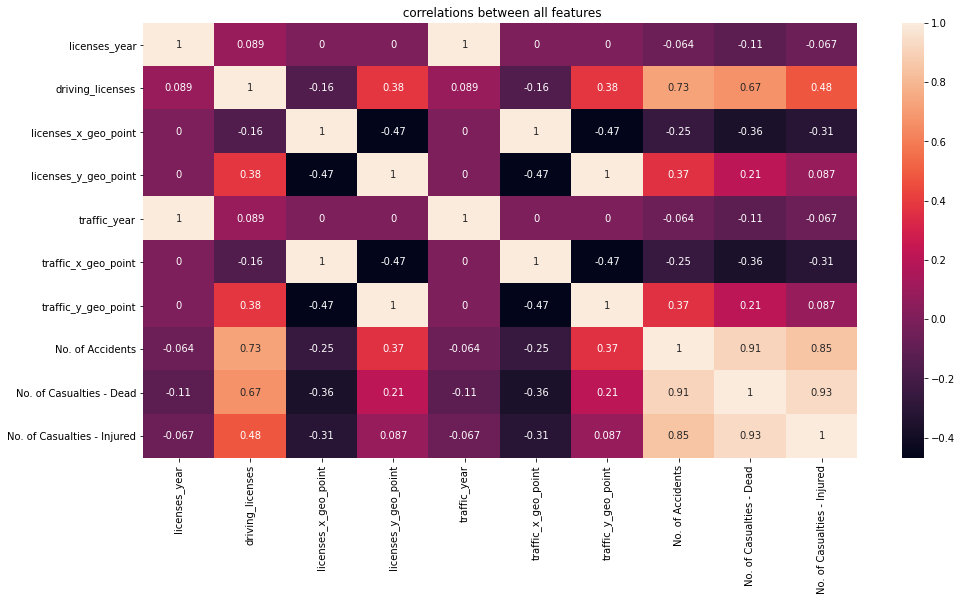

In [91]:
fig, ax7 = plt.subplots(figsize=(16,8))
sns.heatmap(traffic_driving.corr(), annot=True,ax=ax7).set_title(' correlations between all features')

We note that there is a high correlation between the increase in accidents and the issuance of licenses

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [92]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(16,6),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=30) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=16);
        

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

In [93]:
list_of_columns=['driving_licenses','No. of Accidents']

In [94]:
list_of_titles=['Driving Licenses number','Traffic Accidents number']

In [95]:
list_of_xlabels=['driving licenses','Number of Accidents']

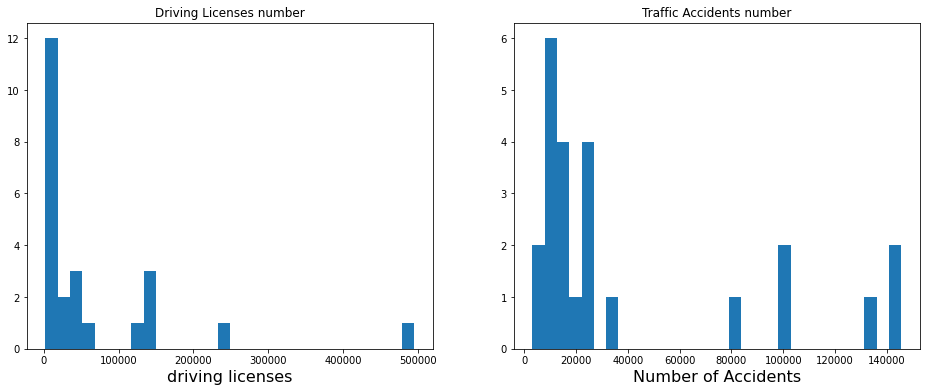

In [96]:
subplot_histograms(traffic_driving,list_of_columns,list_of_titles,list_of_xlabels)

We note that when the number of licenses issued increased, the accidents increased relatively

In [97]:
list_of_columns=['driving_licenses','No. of Casualties - Dead']

In [98]:
list_of_titles=['Driving Licenses number','Number of Casualties - Dead']

In [99]:
list_of_xlabels=['Driving Licenses','Number of Casualties - Dead']

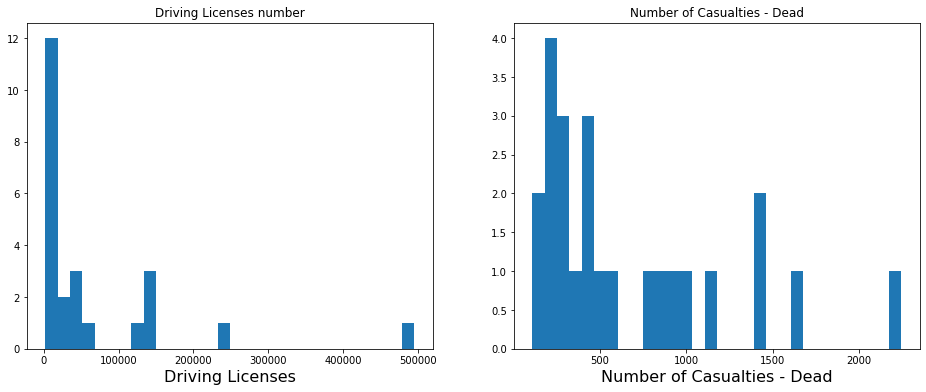

In [100]:
subplot_histograms(traffic_driving,list_of_columns,list_of_titles,list_of_xlabels)

licenses issued, the deaths increased relatively

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [101]:
S_2017=traffic_driving[traffic_driving['licenses_year']== 2017]

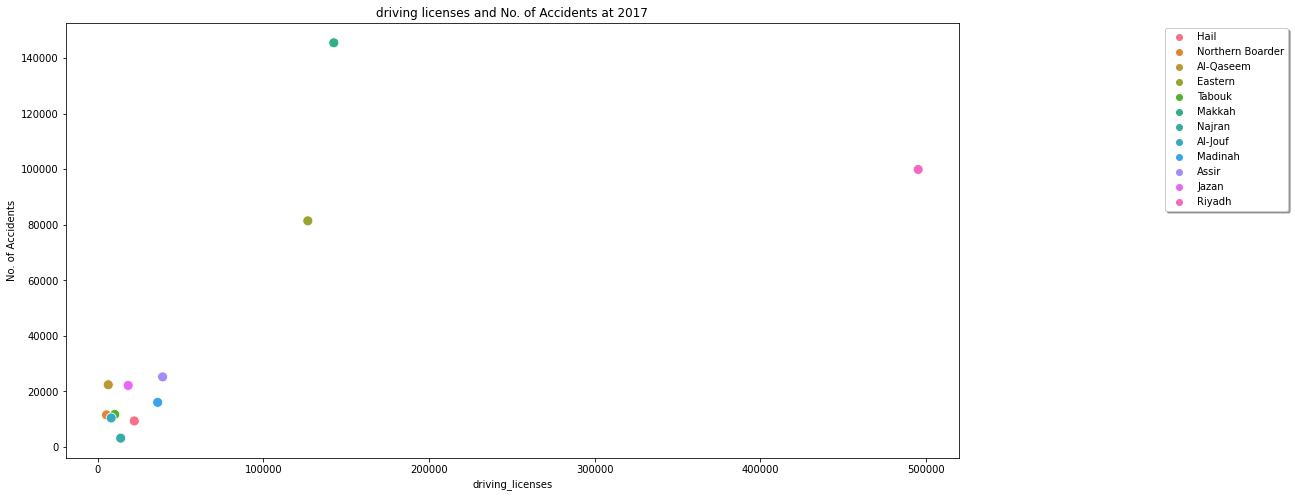

In [102]:
#Driving Licenses vs. Traffic Accidents for 2017
fig = plt.figure(figsize=(16,8))
sns.scatterplot(data = S_2017, x='driving_licenses' ,  y='No. of Accidents', hue='licenses_region',s=100,  color='dodgerblue')
plt.legend(loc='upper right', bbox_to_anchor=( 1.4,1),
          fancybox=True, shadow=True )
plt.title("driving licenses and No. of Accidents at 2017")

plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
          fancybox=True, shadow=True )

In 2017, the issuance of licenses does not affect accidents significantly, except in some cases

<h6> Driving Licenses vs. Traffic Accidents for 2016</h6>

In [103]:
S_2016=traffic_driving[traffic_driving['licenses_year']== 2016]

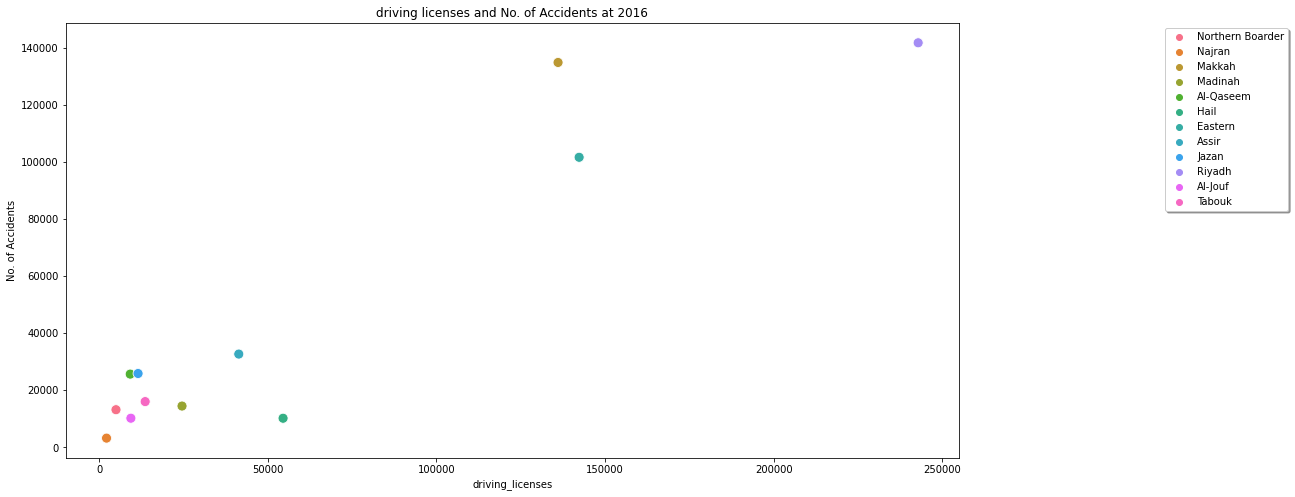

In [104]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(data = S_2016, x='driving_licenses' ,  y='No. of Accidents', hue='licenses_region', s=100, color='dodgerblue')
plt.legend(loc='upper right', bbox_to_anchor=( 1.4,1),
          fancybox=True, shadow=True )
plt.title("driving licenses and No. of Accidents at 2016")

plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
          fancybox=True, shadow=True )

also In 2016, the issuance of licenses does not affect accidents significantly, except in some cases

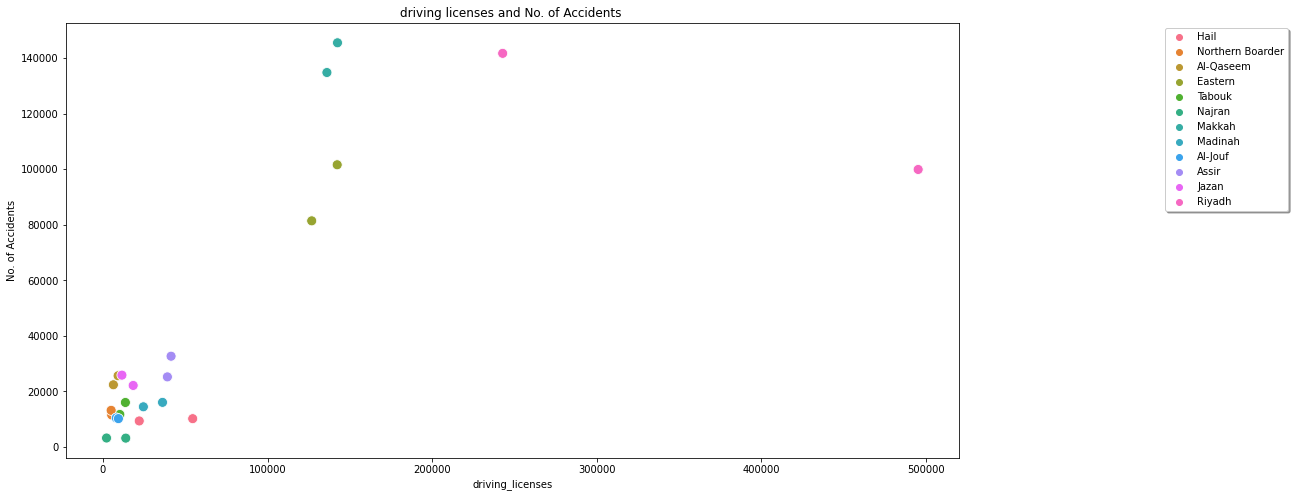

In [105]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(data = traffic_driving, x='driving_licenses' ,  y='No. of Accidents', hue='licenses_region',s=100,  color='dodgerblue')
plt.legend(loc='upper right', bbox_to_anchor=( 1.4,1),
          fancybox=True, shadow=True )
plt.title("driving licenses and No. of Accidents ")

plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
          fancybox=True, shadow=True )

<h6>Driving Licenses for 2016 vs 2017</h6>

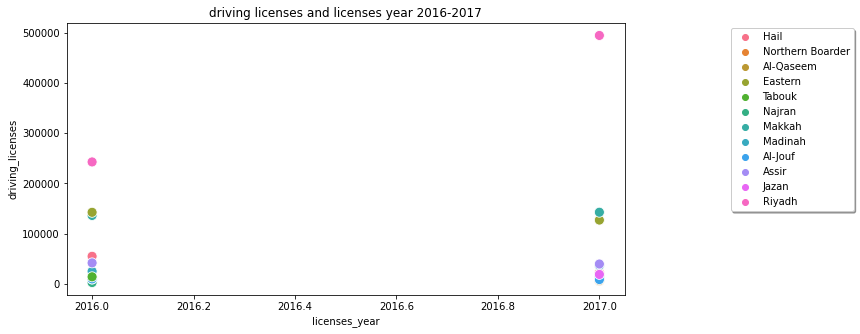

In [106]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot(data = traffic_driving, x='licenses_year' ,  y='driving_licenses', hue='licenses_region',s=100,  color='dodgerblue')

plt.title("driving licenses and licenses year 2016-2017")

plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
          fancybox=True, shadow=True )

<p>We notice that the city of Riyadh has more licenses issued than other regions.</p>
<p>And the number of licenses in the two years 2016-2017 is fairly close</p>

<h6>Traffic Accidents for 2016 vs 2017</h6>

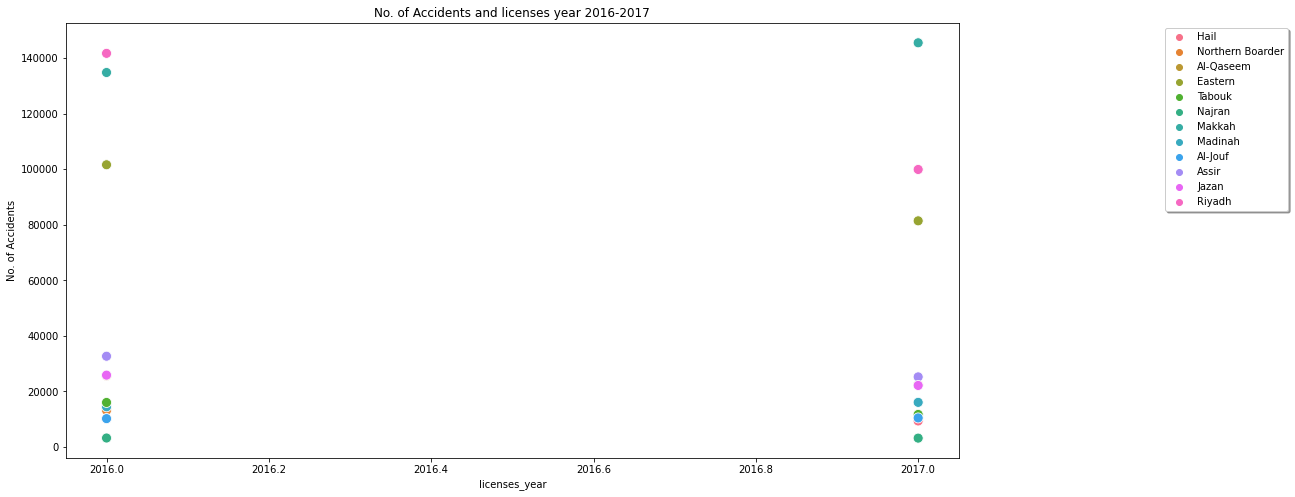

In [107]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(data = traffic_driving, x='licenses_year' ,  y='No. of Accidents', hue='licenses_region',s=100,  color='dodgerblue')

# .set_title("driving licenses and licenses year");
plt.title("No. of Accidents and licenses year 2016-2017")

plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
          fancybox=True, shadow=True )

<p>We note that Makkah, Eastern and Riyadh are the most frequent incidents </p>
<p>We also note that the Eastern and Riyadh decreased the number of accidents in 2017</p>

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

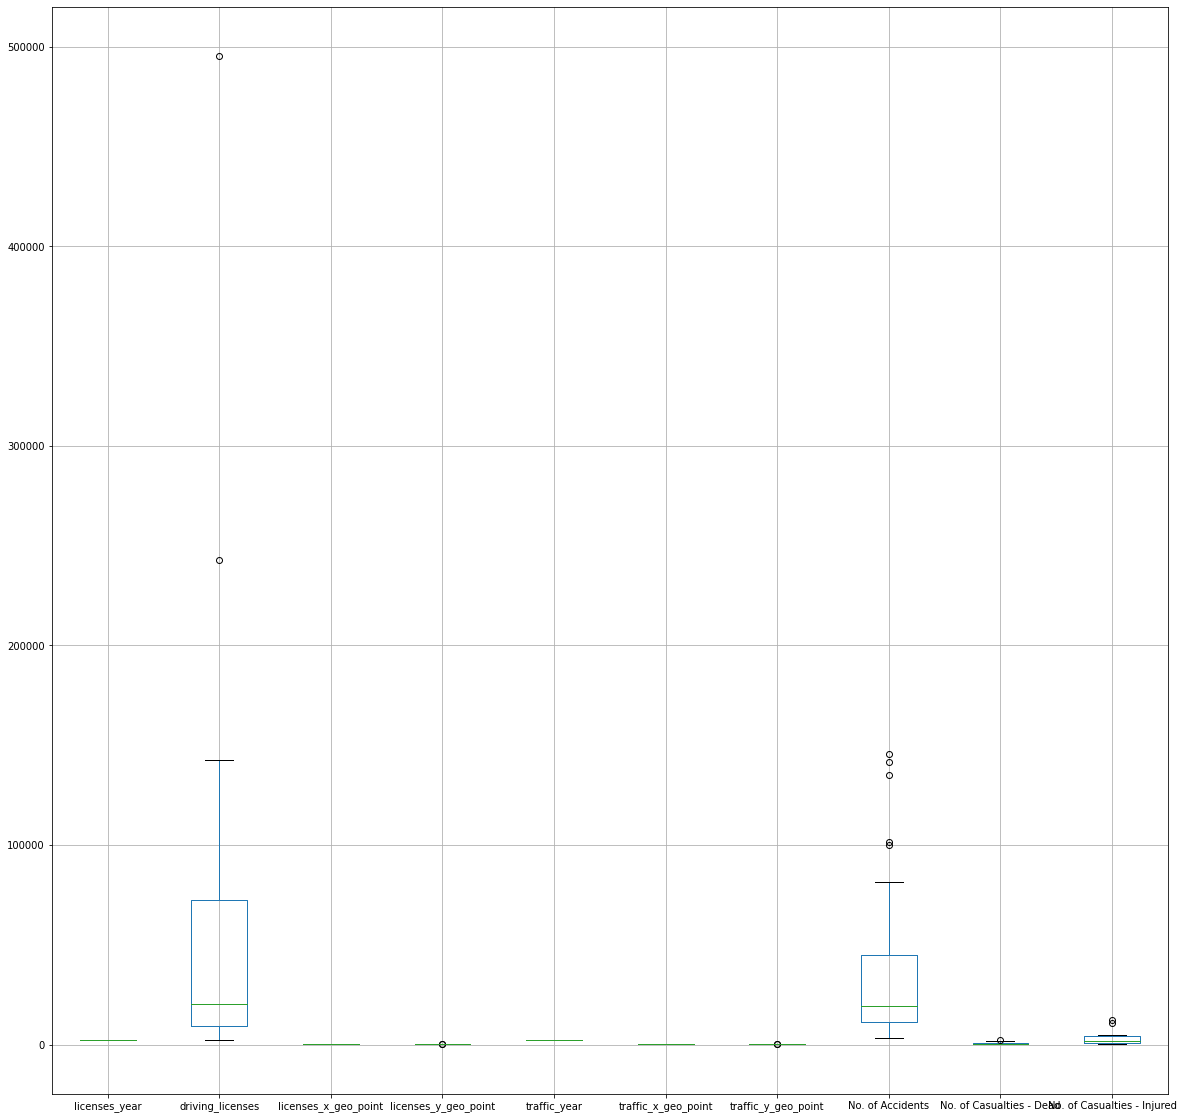

In [108]:
traffic_driving.boxplot(figsize=(20,20));

<AxesSubplot:>

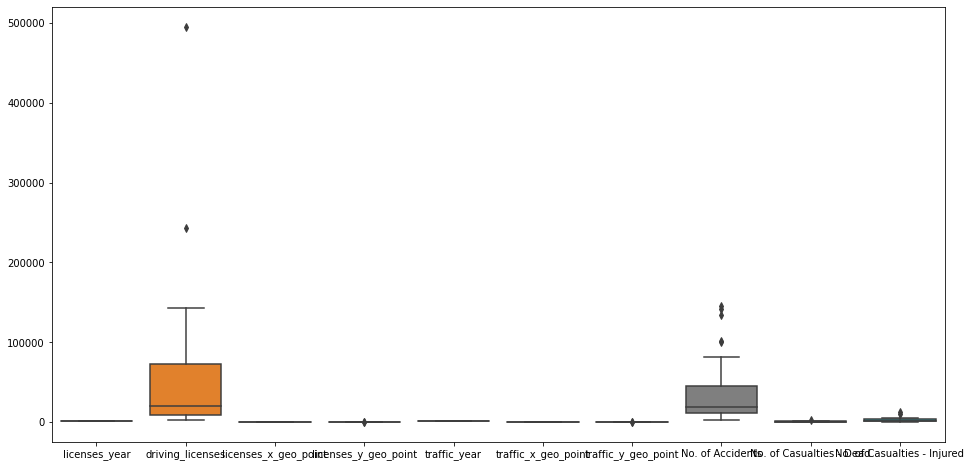

In [109]:
fig = plt.figure(figsize=(16,8))
sns.boxplot(data=traffic_driving)

There is a difference in the distribution of the data together causing blurring of some columns
changing the location is often a component of the process and preserves the shape of the data.
so i'll use standardization 

In [110]:
def var_standardized(var):
    var_stand = (var.select_dtypes(include=np.number)-var.mean())/var.std()
    return var_stand

In [111]:
traffic_drivingـstandardized = var_standardized(traffic_driving)

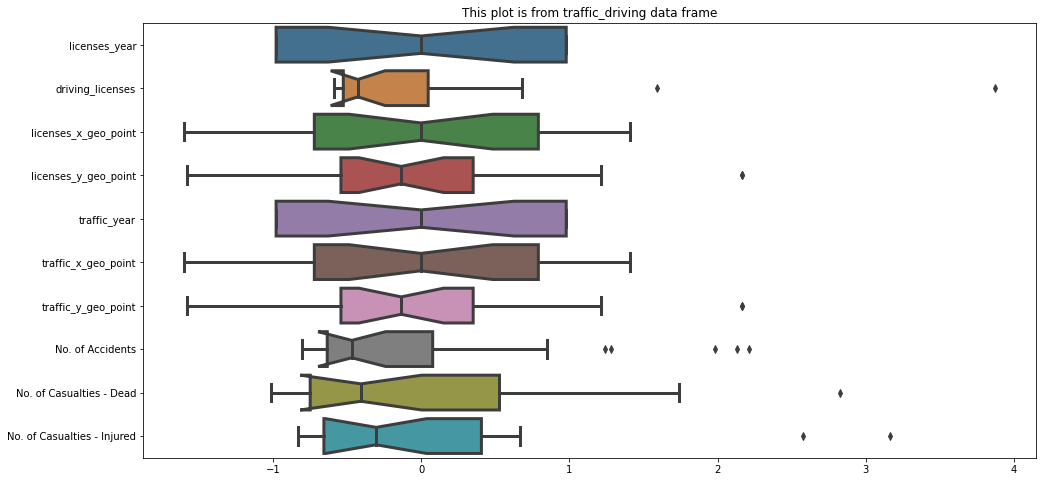

In [112]:
fig,ax=plt.subplots(figsize=(16,8))

sns.boxplot(data=traffic_drivingـstandardized, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.title('This plot is from traffic_driving data frame');

In [113]:
traffic_drivingـstandardized = var_standardized(traffic_driving)

In [114]:
traffic_drivingـstandardized

,licenses_year,driving_licenses,licenses_x_geo_point,licenses_y_geo_point,traffic_year,traffic_x_geo_point,traffic_y_geo_point,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,0.978945,-0.410367,0.761802,-0.365667,0.978945,0.761802,-0.365667,-0.673969,-0.739859,-0.700507
1,0.978945,-0.562093,1.410212,-0.256145,0.978945,1.410212,-0.256145,-0.628201,-1.015925,-0.833253
2,0.978945,-0.552693,0.482578,0.187819,0.978945,0.482578,0.187819,-0.398091,-0.642424,-0.476602
3,0.978945,0.538484,-0.191837,2.167724,0.978945,-0.191837,2.167724,0.852063,0.519578,0.397392
4,0.978945,-0.517249,0.877934,-1.582106,0.978945,0.877934,-1.582106,-0.624537,-0.590098,-0.544139
5,-0.978945,-0.565008,1.410212,-0.256145,-0.978945,1.410212,-0.256145,-0.593129,-0.869773,-0.747750
6,-0.978945,-0.590409,-1.313529,1.213686,-0.978945,-1.313529,1.213686,-0.804093,-0.905860,-0.722798
7,0.978945,0.680394,-0.576623,-0.417168,0.978945,-0.576623,-0.417168,2.209807,1.742928,2.576556
8,-0.978945,0.622148,-0.576623,-0.417168,-0.978945,-0.576623,-0.417168,1.983128,2.829148,3.162102
9,-0.978945,-0.387682,0.188273,-0.932703,-0.978945,0.188273,-0.932703,-0.566041,0.265164,0.434322


after standarization
 variables does not impact the amount of variance you can account for. This is because we are only moving and and adjusting the magnitude of the distribution: the shape of the distribution does not change.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [115]:
traffic_driving.describe()

,licenses_year,driving_licenses,licenses_x_geo_point,licenses_y_geo_point,traffic_year,traffic_x_geo_point,traffic_y_geo_point,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2016.500000,67351.541667,24.115617,42.697475,2016.500000,24.115617,42.697475,41201.500000,675.041667,2878.541667
std,0.510754,110429.397645,4.312442,3.436948,0.510754,4.312442,3.436948,47216.564791,554.215739,3005.740233
min,2016.000000,2153.000000,17.207231,37.259858,2016.000000,17.207231,37.259858,3193.000000,112.000000,374.000000
25%,2016.000000,9323.250000,21.006418,40.837027,2016.000000,21.006418,40.837027,11272.250000,260.000000,905.500000
50%,2016.500000,20190.000000,24.107933,42.234850,2016.500000,24.107933,42.234850,19115.500000,450.000000,1965.500000
75%,2017.000000,72584.250000,27.526048,43.903688,2017.000000,27.526048,43.903688,44871.250000,968.000000,4100.750000
max,2017.000000,495307.000000,30.197075,50.147830,2017.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000


In [116]:
traffic_driving.median()

licenses_year                   2016.500000
driving_licenses               20190.000000
licenses_x_geo_point              24.107933
licenses_y_geo_point              42.234850
traffic_year                    2016.500000
traffic_x_geo_point               24.107933
traffic_y_geo_point               42.234850
No. of Accidents               19115.500000
No. of Casualties - Dead         450.000000
No. of Casualties - Injured     1965.500000
dtype: float64

In [117]:
stats.mode(traffic_driving)

ModeResult(mode=array([[2016, 'Al-Jouf', 2153, 17.2072313962, 37.2598581394, 2016,
        'Al-Jouf', 17.2072313962, 37.2598581394, 3193, 112, 374]],
      dtype=object), count=array([[12,  2,  1,  2,  2, 12,  2,  2,  2,  1,  1,  1]]))

In [118]:
print(f'Mean:\n {np.mean(traffic_driving)}\nMedian: {traffic_driving.median()}\nMode: {stats.mode(traffic_driving)[0][0]}\nMode Count: {stats.mode(traffic_driving)[1][0]}')

Mean:
 licenses_year                   2016.500000
driving_licenses               67351.541667
licenses_x_geo_point              24.115617
licenses_y_geo_point              42.697475
traffic_year                    2016.500000
traffic_x_geo_point               24.115617
traffic_y_geo_point               42.697475
No. of Accidents               41201.500000
No. of Casualties - Dead         675.041667
No. of Casualties - Injured     2878.541667
dtype: float64
Median: licenses_year                   2016.500000
driving_licenses               20190.000000
licenses_x_geo_point              24.107933
licenses_y_geo_point              42.234850
traffic_year                    2016.500000
traffic_x_geo_point               24.107933
traffic_y_geo_point               42.234850
No. of Accidents               19115.500000
No. of Casualties - Dead         450.000000
No. of Casualties - Injured     1965.500000
dtype: float64
Mode: [2016 'Al-Jouf' 2153 17.2072313962 37.2598581394 2016 'Al-Jouf'
 17.2

In [119]:
traffic_driving

,licenses_year,licenses_region,driving_licenses,licenses_x_geo_point,licenses_y_geo_point,traffic_year,traffic_region,traffic_x_geo_point,traffic_y_geo_point,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2017,Hail,22035,27.400846,41.440696,2017,Hail,27.400846,41.440696,9379,265,773
1,2017,Northern Boarder,5280,30.197075,41.817119,2017,Northern Boarder,30.197075,41.817119,11540,112,374
2,2017,Al-Qaseem,6318,26.196706,43.343000,2017,Al-Qaseem,26.196706,43.343000,22405,319,1446
3,2017,Eastern,126816,23.288331,50.147830,2017,Eastern,23.288331,50.147830,81433,963,4073
4,2017,Tabouk,10232,27.901655,37.259858,2017,Tabouk,27.901655,37.259858,11713,348,1243
5,2016,Northern Boarder,4958,30.197075,41.817119,2016,Northern Boarder,30.197075,41.817119,13196,193,631
6,2016,Najran,2153,18.451100,46.868850,2016,Najran,18.451100,46.868850,3235,173,706
7,2017,Makkah,142487,21.628963,41.263690,2017,Makkah,21.628963,41.263690,145541,1641,10623
8,2016,Makkah,136055,21.628963,41.263690,2016,Makkah,21.628963,41.263690,134838,2243,12383
9,2016,Madinah,24540,24.927535,39.491824,2016,Madinah,24.927535,39.491824,14475,822,4184


In [120]:
mode_ = stats.mode(traffic_driving.round())
print(mode_.mode)

[[2016 'Al-Jouf' 2153 23.0 43.0 2016 'Al-Jouf' 23.0 43.0 3193 112 374]]


In [121]:
# Range
# Find range with np.ptp():
print(np.ptp(traffic_driving['driving_licenses']))
print(np.ptp(traffic_driving['No. of Accidents']))

493154
142348


In [122]:
print(np.std(traffic_driving))

licenses_year                       0.500000
driving_licenses               108104.307823
licenses_x_geo_point                4.221643
licenses_y_geo_point                3.364583
traffic_year                        0.500000
traffic_x_geo_point                 4.221643
traffic_y_geo_point                 3.364583
No. of Accidents                46222.420509
No. of Casualties - Dead          542.546732
No. of Casualties - Injured      2942.454403
dtype: float64


In [123]:
print(np.var(traffic_driving))

licenses_year                  2.500000e-01
driving_licenses               1.168654e+10
licenses_x_geo_point           1.782227e+01
licenses_y_geo_point           1.132042e+01
traffic_year                   2.500000e-01
traffic_x_geo_point            1.782227e+01
traffic_y_geo_point            1.132042e+01
No. of Accidents               2.136512e+09
No. of Casualties - Dead       2.943570e+05
No. of Casualties - Injured    8.658038e+06
dtype: float64


In [124]:
stats.skew(traffic_driving['driving_licenses'])

2.7224334104199333

In [125]:
stats.skew(traffic_driving['No. of Accidents'])

1.2997462886510498

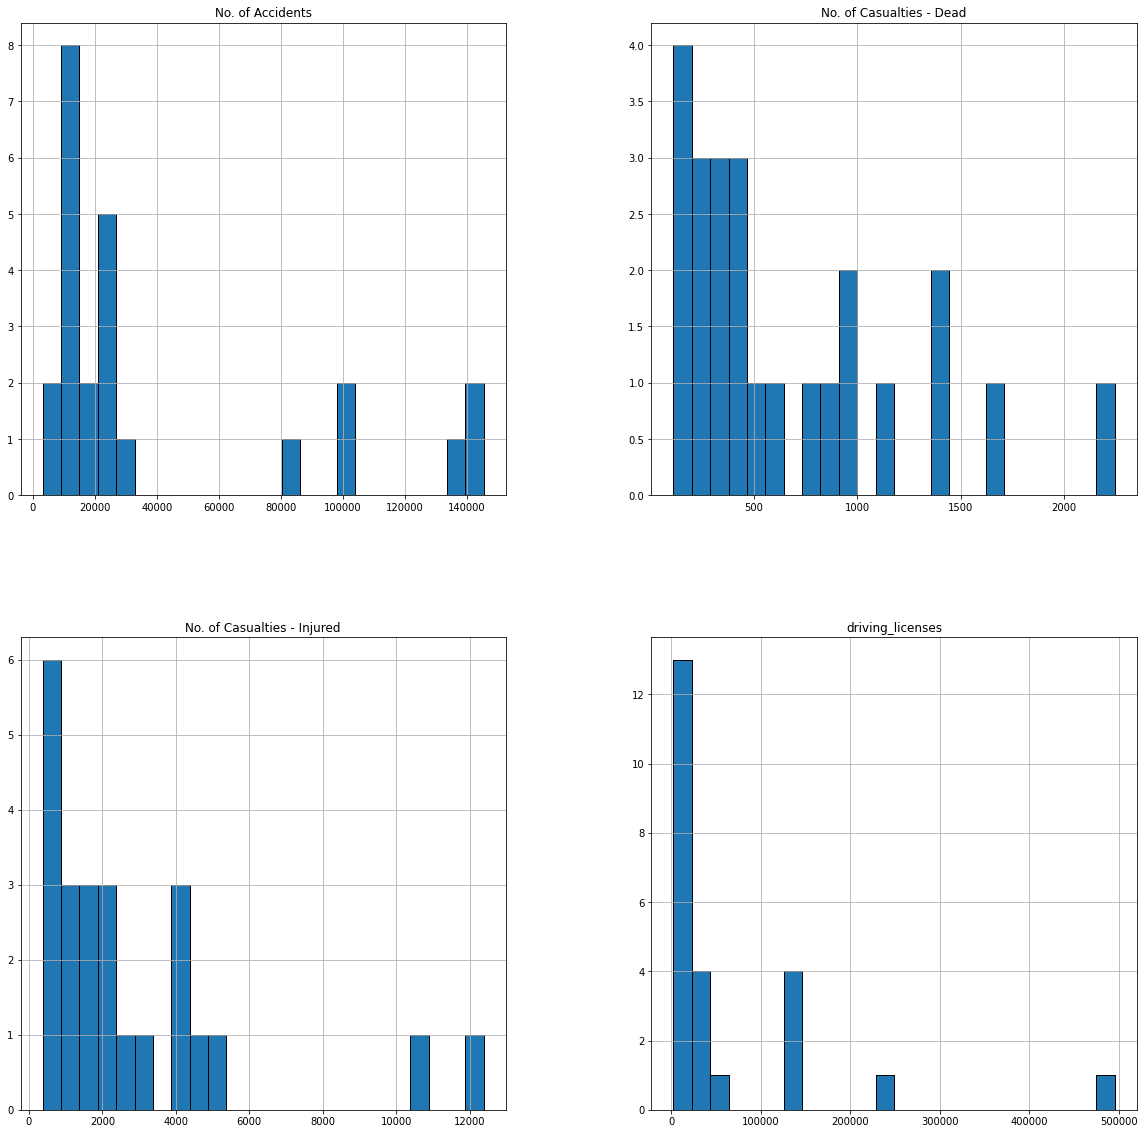

In [126]:
traffic_driving[['driving_licenses','No. of Accidents',
     'No. of Casualties - Dead','No. of Casualties - Injured']].hist(bins=len(traffic_driving),
                                                                     figsize=(20,20),edgecolor='black')
plt.show()

In [127]:
traffic_driving[['driving_licenses','No. of Accidents','No. of Casualties - Dead','No. of Casualties - Injured']].skew(axis = 0, skipna = True)

driving_licenses               2.907396
No. of Accidents               1.388051
No. of Casualties - Dead       1.328380
No. of Casualties - Injured    2.184752
dtype: float64

Answers:
we notice from above Positive skew:  because mode < median < mean 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

When a distribution is symmetric, the mean, median, and mode are the same.

Symmetric: mean == median == mode

When a distribution is negatively skewed, the mean is less than the median, which is less than the mode.

Negative skew: mean < median < mode

When a distribution is positively skewed, the mean is greater than the median, which is greater than the mode.

Positive skew: mode < median < mean

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [128]:
def dist_plotter(sample):
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.distplot(sample, bins=50, kde=False)
    


In [129]:
def sampler(population, n=30, k=1000):
    sample_means = []
    for i in range(k):
        sample = np.random.choice(population, size=n, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

/Users/Maha48/test_env/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, ' Number of Accidents')

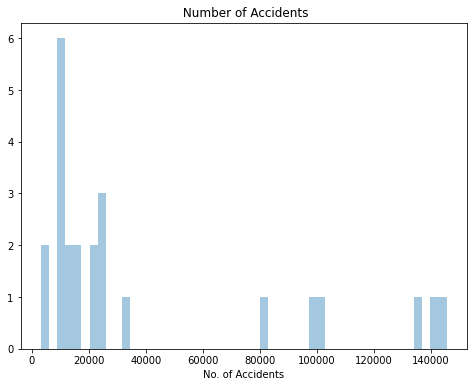

In [130]:
means2 = sampler(traffic_driving['No. of Accidents'])  # It will call sampler function with default n=30, k=1000

dist_plotter(traffic_driving['No. of Accidents'])
plt.title(" Number of Accidents")

Text(0.5, 1.0, 'Driving licenses')

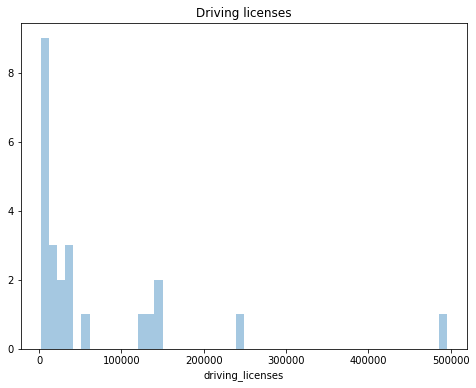

In [131]:
means2 = sampler(traffic_driving['driving_licenses'])  # It will call sampler function with default n=30, k=1000

dist_plotter(traffic_driving['driving_licenses'])
plt.title("Driving licenses")

Positive skew: mode < median < mean
Positive skewness values correspond to a longer or fatter tail on the right side

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [132]:
# Code

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Makkah, Eastern and Riyadh are the most frequent

Since there are changes that occurred in Saudi Arabia in the year 2018-2019 due to the issuance of the decision of Saudi women driving. I am trying to measure the extent of the data affected by this decision in terms of the increase in the issuance of licenses and the number of accidents

In [133]:
driving_licenses_2018_2019 = pd.read_csv("../data/saudi-arabia-driving-licenses-issued-in-the-kingdom-2018-2019.csv",sep=";")

In [134]:
traffic_accidents_2018_2019 = pd.read_csv("../data/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2018-2019.csv",sep=";")

In [135]:
driving_licenses_2018_2019.head(10)

,Year,Administritive Area,Number of Driving Licenses,geo_shape,geo_point_2d
0,2018,Riyadh,493224,"{""type"": ""Polygon"", ""coordinates"": [[[41.68033...","23.0814341634,45.5857512766"
1,2018,Al-Qaseem,4457,"{""type"": ""Polygon"", ""coordinates"": [[[41.29777...","26.1967063704,43.3429998455"
2,2018,Hail,39575,"{""type"": ""Polygon"", ""coordinates"": [[[39.11323...","27.400845724,41.4406960508"
3,2018,Northern Boarder,3661,"{""type"": ""Polygon"", ""coordinates"": [[[45.17530...","30.197074783,41.8171186952"
4,2018,Najran,7431,"{""type"": ""Polygon"", ""coordinates"": [[[45.08826...","18.4511003068,46.8688495726"
5,2018,Makkah,144873,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[41...","21.628962766,41.2636898334"
6,2018,Jazan,12265,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[42...","17.2072313962,42.6525807422"
7,2018,Madinah,23335,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[38...","24.927534539,39.4918237173"
8,2018,Assir,22362,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[41...","19.1387847401,42.941470036"
9,2018,Al-Jouf,6834,"{""type"": ""Polygon"", ""coordinates"": [[[38.24572...","29.9677445762,39.5570371172"


In [136]:
traffic_accidents_2018_2019.head(10)

,Year,Region,Indicator,Value,geo_shape,geo_point_2d
0,2018,Makkah,No. of Casualties - Dead,1301,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[41...","21.628962766,41.2636898334"
1,2018,Makkah,No. of Casualties - Injured,9931,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[41...","21.628962766,41.2636898334"
2,2018,Madinah,No. of Accidents,20547,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[38...","24.927534539,39.4918237173"
3,2018,Qassim,No. of Accidents,17510,"{""type"": ""Polygon"", ""coordinates"": [[[41.29777...","26.1967063704,43.3429998455"
4,2018,Qassim,No. of Casualties - Injured,1269,"{""type"": ""Polygon"", ""coordinates"": [[[41.29777...","26.1967063704,43.3429998455"
5,2018,Eastern Region,No. of Casualties - Injured,2969,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[50...","23.2883307307,50.1478302439"
6,2018,Asir,No. of Accidents,25964,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[41...","19.1387847401,42.941470036"
7,2018,Hail,No. of Casualties - Dead,193,"{""type"": ""Polygon"", ""coordinates"": [[[39.11323...","27.400845724,41.4406960508"
8,2018,Hail,No. of Accidents,6955,"{""type"": ""Polygon"", ""coordinates"": [[[39.11323...","27.400845724,41.4406960508"
9,2018,Hail,No. of Casualties - Injured,912,"{""type"": ""Polygon"", ""coordinates"": [[[39.11323...","27.400845724,41.4406960508"


Display the data types of each feature

In [137]:
driving_licenses_2018_2019.dtypes

Year                           int64
Administritive Area           object
Number of Driving Licenses     int64
geo_shape                     object
geo_point_2d                  object
dtype: object

In [138]:
traffic_accidents_2018_2019.dtypes

Year             int64
Region          object
Indicator       object
Value            int64
geo_shape       object
geo_point_2d    object
dtype: object

Investigate missing values 

In [139]:
driving_licenses_2018_2019.isna().sum()

Year                          0
Administritive Area           0
Number of Driving Licenses    0
geo_shape                     1
geo_point_2d                  1
dtype: int64

In [140]:
traffic_accidents_2018_2019.isna().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_shape       6
geo_point_2d    6
dtype: int64

In my research, this is not affected by geography or geographic point so I'm going to delete these two columns

In [141]:
driving_licenses_2018_2019=driving_licenses_2018_2019.drop(columns=['geo_shape','geo_point_2d'], axis=1)

In [142]:
traffic_accidents_2018_2019=traffic_accidents_2018_2019.drop(columns=['geo_shape','geo_point_2d'], axis=1)

In [143]:
driving_licenses_2018_2019

,Year,Administritive Area,Number of Driving Licenses
0,2018,Riyadh,493224
1,2018,Al-Qaseem,4457
2,2018,Hail,39575
3,2018,Northern Boarder,3661
4,2018,Najran,7431
5,2018,Makkah,144873
6,2018,Jazan,12265
7,2018,Madinah,23335
8,2018,Assir,22362
9,2018,Al-Jouf,6834


In [144]:
traffic_accidents_2018_2019

,Year,Region,Indicator,Value
0,2018,Makkah,No. of Casualties - Dead,1301
1,2018,Makkah,No. of Casualties - Injured,9931
2,2018,Madinah,No. of Accidents,20547
3,2018,Qassim,No. of Accidents,17510
4,2018,Qassim,No. of Casualties - Injured,1269
...,...,...,...,...
79,2019,Madinah,No. of Accidents,21689
80,2019,Eastern Region,No. of Casualties - Dead,688
81,2019,Eastern Region,No. of Accidents,21235
82,2019,Eastern Region,No. of Casualties - Injured,3021


check if there is rows are not associated with regions

In [145]:
traffic_accidents_2018_2019['Region'].unique()

array(['Makkah', 'Madinah', 'Qassim', 'Eastern Region', 'Asir', 'Hail',
       'Northern Borders', 'Jazan', 'Najran', 'Al-Jouf', 'Total',
       'Riyadh', 'Tabouk', 'Al-Baha'], dtype=object)

In [146]:
driving_licenses_2018_2019['Administritive Area'].unique()

array(['Riyadh', 'Al-Qaseem', 'Hail', 'Northern Boarder', 'Najran',
       'Makkah', 'Jazan', 'Madinah', 'Assir', 'Al-Jouf', 'Eastern',
       'Tabouk', 'Al-Baha', 'Total'], dtype=object)

Total  is sum of traffic accidents for all regions.

In [147]:
driving_licenses_back_to_wide=driving_licenses_2018_2019.pivot(index='Administritive Area',columns="Year",values='Number of Driving Licenses').reset_index()
driving_licenses_back_to_wide

Year,Administritive Area,2018
0,Al-Baha,2575
1,Al-Jouf,6834
2,Al-Qaseem,4457
3,Assir,22362
4,Eastern,131639
5,Hail,39575
6,Jazan,12265
7,Madinah,23335
8,Makkah,144873
9,Najran,7431


In [148]:
traffic_accidents_2018_2019.columns

Index(['Year', 'Region', 'Indicator', 'Value'], dtype='object')

In [149]:
traffic_accidents_back_to_wide=traffic_accidents_2018_2019.pivot_table(index=['Year', 'Region'],
                                     columns=['Indicator'],values='Value').reset_index()
traffic_accidents_back_to_wide


Indicator,Year,Region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2018,Al-Baha,1764,111,935
1,2018,Al-Jouf,7355,157,618
2,2018,Asir,25964,696,2192
3,2018,Eastern Region,45077,661,2969
4,2018,Hail,6955,193,912
5,2018,Jazan,19572,563,2112
6,2018,Madinah,20547,483,2666
7,2018,Makkah,103973,1301,9931
8,2018,Najran,3124,176,654
9,2018,Northern Borders,10705,75,428


 Drop unnecessary rows

In [150]:
unnecessaryـrows = traffic_accidents_2018_2019[((traffic_accidents_2018_2019.Region == 'Total'))].index

In [151]:
df_traffic_accidents=traffic_accidents_2018_2019.drop(unnecessaryـrows)

In [152]:
unnecessaryـrows = driving_licenses_2018_2019[((driving_licenses_2018_2019['Administritive Area'] == 'Total'))].index

In [153]:
df_driving_licenses=driving_licenses_2018_2019.drop(unnecessaryـrows)

Change the format of the traffic_accidents_2018_2019 dataset to wide format so that it is clearer to read

In [154]:
df_traffic_accidents2018_2019=df_traffic_accidents.pivot_table(index=['Year', 'Region'],
                                     columns=['Indicator'],values='Value').reset_index()
df_traffic_accidents2018_2019.head(2)

Indicator,Year,Region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2018,Al-Baha,1764,111,935
1,2018,Al-Jouf,7355,157,618


provide quick summary statistics of our numeric columns.

In [155]:
df_traffic_accidents2018_2019.describe()

Indicator,Year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
count,26.000000,26.000000,26.000000,26.000000
mean,2018.500000,24624.807692,453.038462,2427.961538
std,0.509902,28124.004499,369.749805,2758.925117
min,2018.000000,1474.000000,75.000000,413.000000
25%,2018.000000,6988.500000,163.500000,867.750000
50%,2018.500000,17186.000000,288.500000,1232.500000
75%,2019.000000,24428.750000,646.500000,2893.250000
max,2019.000000,103973.000000,1301.000000,11401.000000


In [156]:
df_driving_licenses.describe()

,Year,Number of Driving Licenses
count,13.0,13.000000
mean,2018.0,69218.769231
std,0.0,136094.882357
min,2018.0,2575.000000
25%,2018.0,6834.000000
50%,2018.0,12265.000000
75%,2018.0,39575.000000
max,2018.0,493224.000000


Rename columns 

In [157]:
df_traffic_accidents2018_2019.columns

Index(['Year', 'Region', 'No. of Accidents', 'No. of Casualties - Dead',
       'No. of Casualties - Injured'],
      dtype='object', name='Indicator')

In [158]:
df_driving_licenses.columns

Index(['Year', 'Administritive Area', 'Number of Driving Licenses'], dtype='object')

In [159]:
new_traffic_accidents_col_names = ['traffic_year','traffic_region','traffic_accidents','traffic_dead',
            'traffic_injured']
df_traffic_accidents2018_2019.columns = new_traffic_accidents_col_names 

In [160]:
driving_licenses_2018_2019col_names = ['licenses_year','licenses_region','driving_licenses']
df_driving_licenses.columns = driving_licenses_2018_2019col_names 

Transform the datasets to the same format before merging 

In [161]:
df_traffic_accidents2018_2019['traffic_region'].unique()

array(['Al-Baha', 'Al-Jouf', 'Asir', 'Eastern Region', 'Hail', 'Jazan',
       'Madinah', 'Makkah', 'Najran', 'Northern Borders', 'Qassim',
       'Riyadh', 'Tabouk'], dtype=object)

In [162]:
df_driving_licenses['licenses_region'].unique()

array(['Riyadh', 'Al-Qaseem', 'Hail', 'Northern Boarder', 'Najran',
       'Makkah', 'Jazan', 'Madinah', 'Assir', 'Al-Jouf', 'Eastern',
       'Tabouk', 'Al-Baha'], dtype=object)

In [163]:
region_name={'Makkah': 'Makkah', 
            'Eastern Region': 'Eastern',
            'Tabouk': 'Tabouk',
            'Hail': 'Hail',
            'Northern Boarders':'Northern Boarder',
            'Jazan': 'Jazan',
            'Al-Jouf': 'Al-Jouf', 
            'Al-Baha': 'Al-Baha',
            'Riyadh':'Riyadh',
            'Madinah': 'Madinah',
            'Qassim': 'Al-Qaseem',
            'Najran': 'Najran',
            'Asir': 'Assir'}

In [164]:
df_traffic_accidents2018_2019['traffic_region']=df_traffic_accidents2018_2019['traffic_region'].map(region_name)

In [165]:
df_traffic_accidents2018_2019['traffic_region'].unique()

array(['Al-Baha', 'Al-Jouf', 'Assir', 'Eastern', 'Hail', 'Jazan',
       'Madinah', 'Makkah', 'Najran', nan, 'Al-Qaseem', 'Riyadh',
       'Tabouk'], dtype=object)

In [166]:
df_driving_licenses['licenses_region'].unique()

array(['Riyadh', 'Al-Qaseem', 'Hail', 'Northern Boarder', 'Najran',
       'Makkah', 'Jazan', 'Madinah', 'Assir', 'Al-Jouf', 'Eastern',
       'Tabouk', 'Al-Baha'], dtype=object)

In [167]:
df_driving_licenses.columns

Index(['licenses_year', 'licenses_region', 'driving_licenses'], dtype='object')

Merge dataframes
Join the Driving Licenses & Traffic Accidents dataframes using the region and year in each dataframe as the key.

In [168]:
traffic_driving_2018_2019= df_driving_licenses.merge(df_traffic_accidents2018_2019, left_on=['licenses_region','licenses_year'], right_on=['traffic_region','traffic_year'])

In [169]:
traffic_driving_2018_2019

,licenses_year,licenses_region,driving_licenses,traffic_year,traffic_region,traffic_accidents,traffic_dead,traffic_injured
0,2018,Riyadh,493224,2018,Riyadh,79884,1091,4554
1,2018,Al-Qaseem,4457,2018,Al-Qaseem,17510,225,1269
2,2018,Hail,39575,2018,Hail,6955,193,912
3,2018,Najran,7431,2018,Najran,3124,176,654
4,2018,Makkah,144873,2018,Makkah,103973,1301,9931
5,2018,Jazan,12265,2018,Jazan,19572,563,2112
6,2018,Madinah,23335,2018,Madinah,20547,483,2666
7,2018,Assir,22362,2018,Assir,25964,696,2192
8,2018,Al-Jouf,6834,2018,Al-Jouf,7355,157,618
9,2018,Eastern,131639,2018,Eastern,45077,661,2969


Save data cleaned, merged dataframes

In [170]:
traffic_driving_2018_2019.to_csv('../data/combined_datasets2018_2019.csv')

visualize correlations between all numeric features

Text(0.5, 1.0, ' correlations between all features')

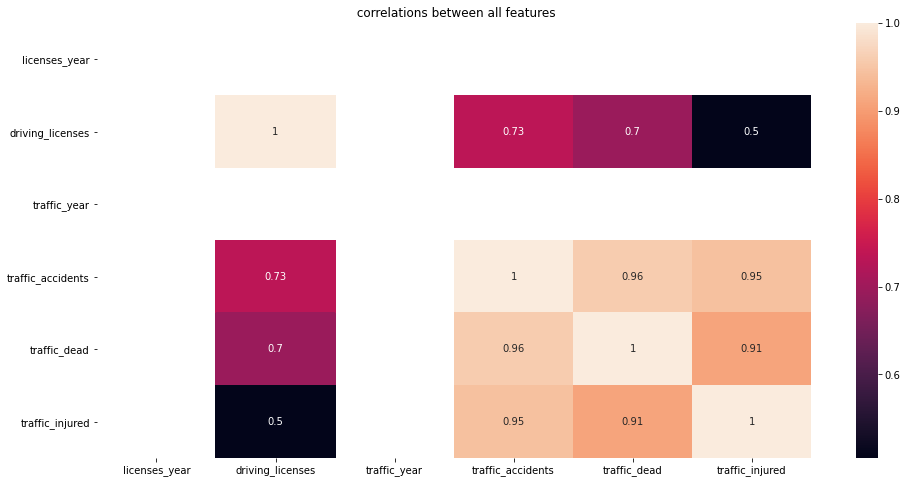

In [171]:
fig, ax7 = plt.subplots(figsize=(16,8))
sns.heatmap(traffic_driving_2018_2019.corr(), annot=True,ax=ax7).set_title(' correlations between all features')

We note that there is a high correlation between the increase in accidents and the issuance of licenses

In [172]:
traffic_driving_2018_2019.columns

Index(['licenses_year', 'licenses_region', 'driving_licenses', 'traffic_year',
       'traffic_region', 'traffic_accidents', 'traffic_dead',
       'traffic_injured'],
      dtype='object')

In [173]:
list_of_columns=['driving_licenses','traffic_accidents']

In [174]:
list_of_titles=['Driving Licenses number','Traffic Accidents number']

In [175]:
list_of_xlabels=['driving licenses','Number of Accidents']

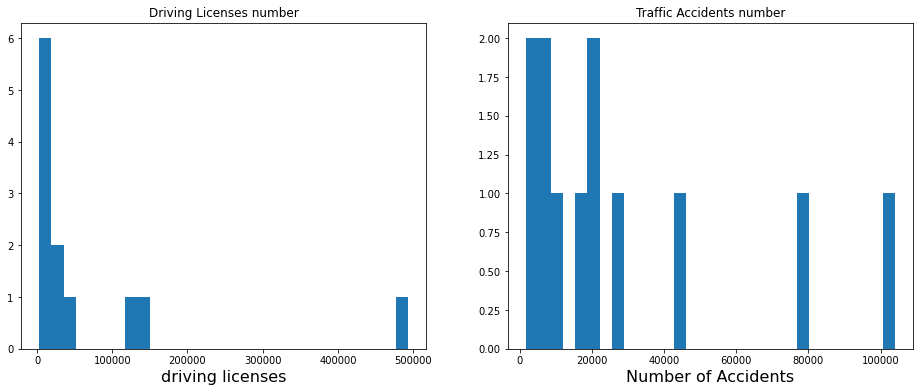

In [176]:
subplot_histograms(traffic_driving_2018_2019,list_of_columns,list_of_titles,list_of_xlabels)

In [177]:
traffic_drivingـstandardized = var_standardized(traffic_driving_2018_2019)

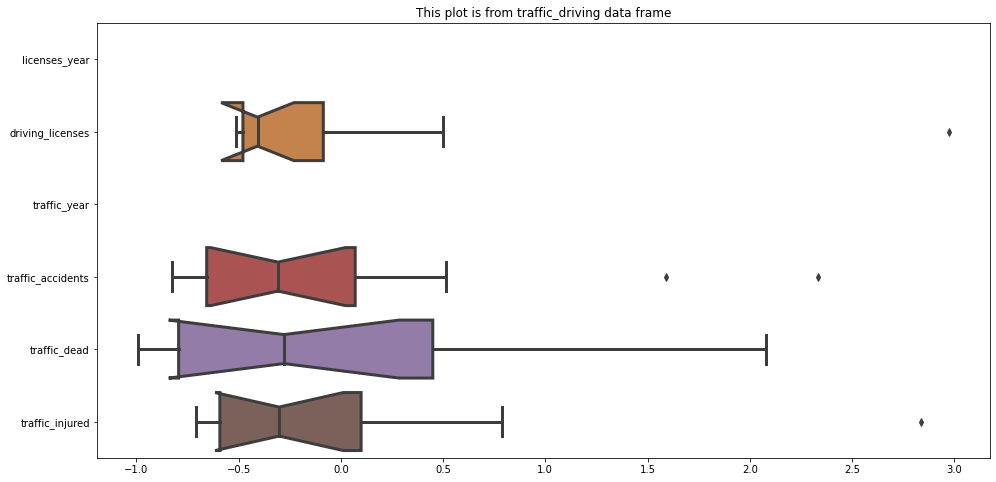

In [178]:
fig,ax=plt.subplots(figsize=(16,8))

sns.boxplot(data=traffic_drivingـstandardized, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.title('This plot is from traffic_driving data frame');

Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms,  be better able to identify clear outliers or differences in IQR, etc.

The relationship between the number of accidents and driving licenses issued in 2018

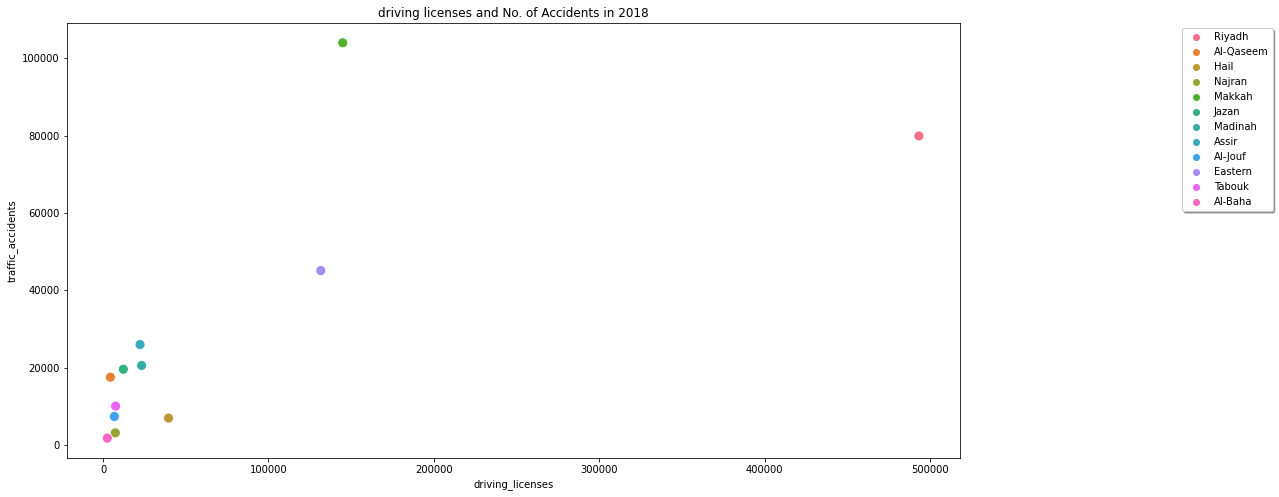

In [179]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(data = traffic_driving_2018_2019, x='driving_licenses' ,  y='traffic_accidents', hue='licenses_region', s=100, color='dodgerblue')
plt.legend(loc='upper right', bbox_to_anchor=( 1.4,1),
          fancybox=True, shadow=True )
plt.title("driving licenses and No. of Accidents in 2018")

plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
          fancybox=True, shadow=True )

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Riyadh, Makkah and  Eastern are the main cities in Saudi Arabia, and to measure the impact of the Saudi women's driving decision on issuing licenses and accidents in Saudi Arabia, we compare the years 2016-2017 before the implementation of the decision and the year 2018 after implementation. In 2016, Riyadh issued nearly 250,000 licenses per year, and they nearly doubled. In 2017, after the decision to allow women to drive was issued, and they remained at 500,000 in 2018 after the implementation of the decision. As for accidents, Riyadh in 2016 amounted to approximately 140,000 accidents, and in 2017, reduced to 100,000 accidents, and compared to 2018, the number of accidents reached 80,000, which is nearly half the number of accidents before the decision was issued. 


 In Makkah and Eastern, the licenses in 2016-2017 were approximately 150,000, and in 2018 there was no significant increase. As for the accidents, in the years 2016-2017, there were approximately 140,000 accidents in Makkah and nearly 100,000accidents in Eastern, while in 2018 the percentage decreased dramatically to 100,000 in Makkah and 40,000 in Eastern.
 
This indicates proof of women's ability to drive and their commitment to traffic and safety regulations [see link here](https://www.stats.gov.sa/ar/news/384)